Import Libraries




In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

import warnings
warnings.filterwarnings('ignore')

## ${\textbf{Import Data}}$

In [3]:

df= pd.read_csv('segmentation data.csv', index_col = 0)

## ${\textbf{Explore Data}}$

In [4]:

df.head()

,gender,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [5]:
df.describe()

,gender,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   gender           2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


## ${\textbf{Correlation Estimate}}$

In [7]:

df.corr()

,gender,Marital status,Age,Education,Income,Occupation,Settlement size
gender,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


## ${\textbf{Visualize Raw Data}}$

Text(0.5, 1.0, 'Visualization of raw data')

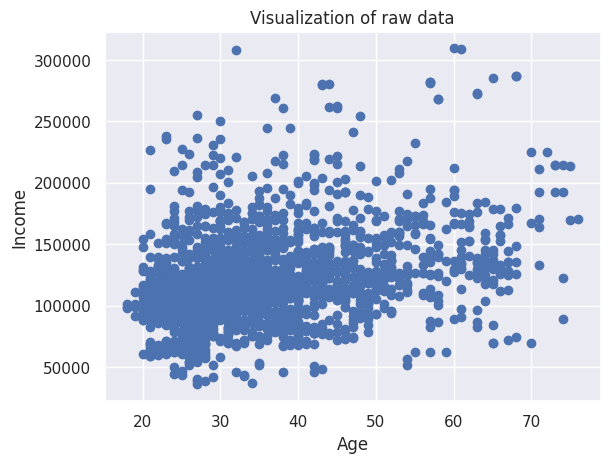

In [8]:

plt.scatter(df.iloc[:, 2], df.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

## ${\textbf{Standardization}}$

In [9]:

scaler = StandardScaler()
df_std = scaler.fit_transform(df)

## ${\textbf{K-means Clustering}}$

In [10]:

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

In [11]:
for i, wcss_value in enumerate(wcss, start=1):
    print(f"Number of clusters: {i}, WCSS: {wcss_value}")

Number of clusters: 1, WCSS: 14000.0
Number of clusters: 2, WCSS: 10514.558847734443
Number of clusters: 3, WCSS: 8630.913216898227
Number of clusters: 4, WCSS: 7169.87082246584
Number of clusters: 5, WCSS: 6403.134167928612
Number of clusters: 6, WCSS: 5830.9563029611545
Number of clusters: 7, WCSS: 5378.854705323012
Number of clusters: 8, WCSS: 5005.134609766622
Number of clusters: 9, WCSS: 4724.527779695852
Number of clusters: 10, WCSS: 4295.656622405144


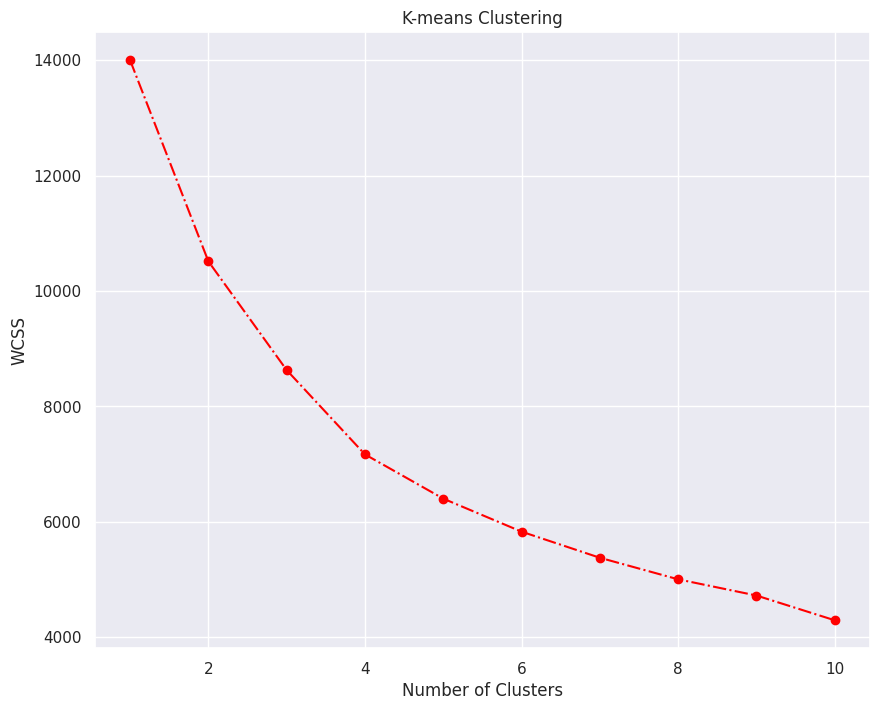

In [12]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [13]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [14]:
# We divide our data into the four clusters.
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

### ${\textbf{Results}}$

In [15]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans= df_std.copy()
df_segm_kmeans = pd.DataFrame(data = df_std,columns = df.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [16]:
df_segm_kmeans.head()

,gender,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3


In [17]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis.head()

,gender,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
1,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
2,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
3,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


In [18]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})


,gender,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
well-off,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
fewer-opportunities,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
standard,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
career focused,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


In [19]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off',
                                                                  1:'fewer opportunities',
                                                                  2:'standard',
                                                                  3:'career focused'})

In [20]:
df_segm_kmeans.head()

,gender,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0,well-off
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2,standard
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1,fewer opportunities
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3,career focused
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3,career focused


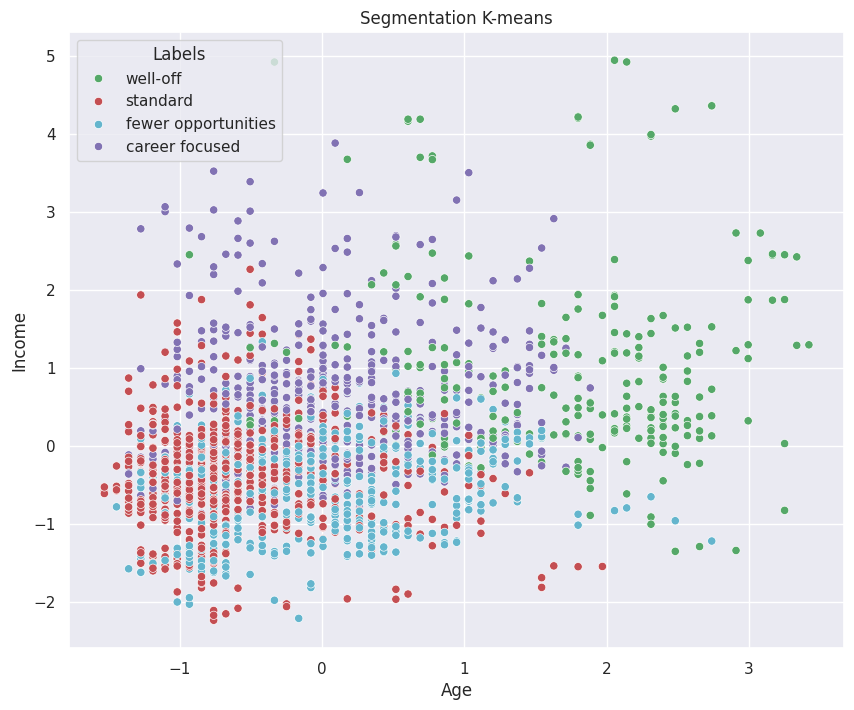

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


if 'Labels' not in df_segm_kmeans.columns:
    print("Error: 'Labels' column not found in DataFrame.")
else:
    x_axis = df_segm_kmeans['Age']
    y_axis = df_segm_kmeans['Income']
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_kmeans['Labels'], palette=['g', 'r', 'c', 'm'])
    plt.title('Segmentation K-means')
    plt.xlabel('Age')
    plt.ylabel('Income')
    plt.show()


### ${\textbf{PCA}}$

In [22]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [23]:
# Fit PCA with our standardized data.
pca.fit(df_std)

PCA()

In [24]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

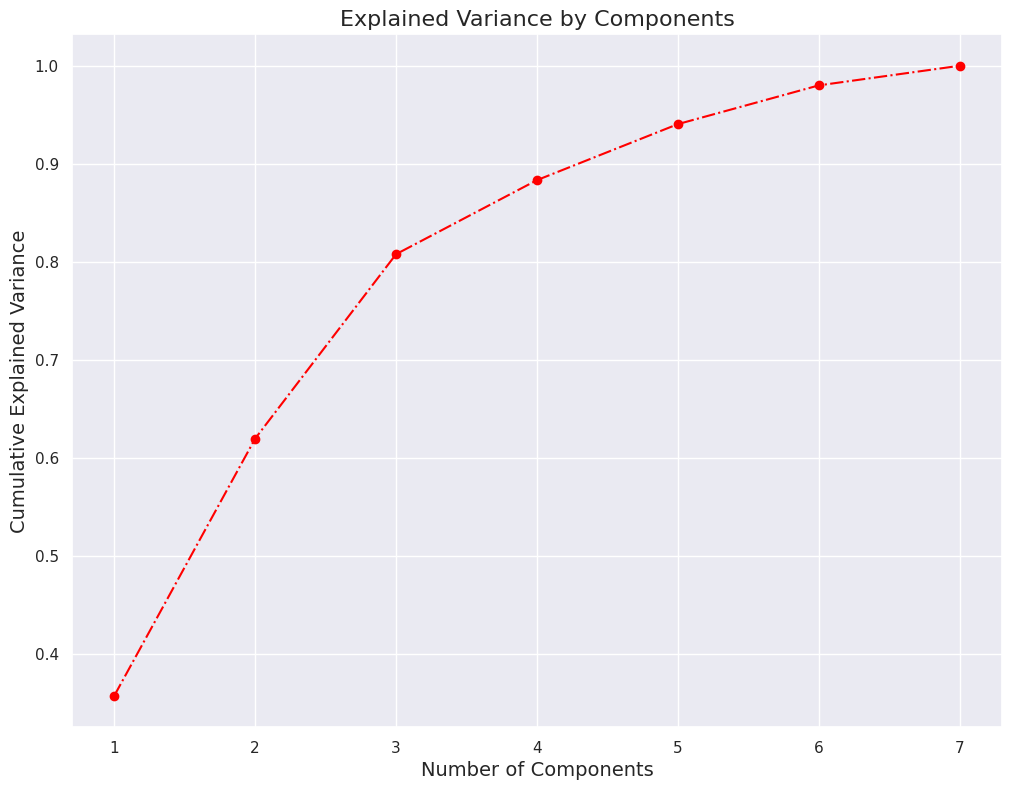

In [25]:

plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-.',color='red')
plt.title('Explained Variance by Components',fontsize=16)
plt.xlabel('Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained Variance',fontsize=14)

In [26]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph.
pca = PCA(n_components = 3)

In [27]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(df_std)

PCA(n_components=3)

### ${\textbf{PCA Results}}$

In [28]:

pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [29]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,gender,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


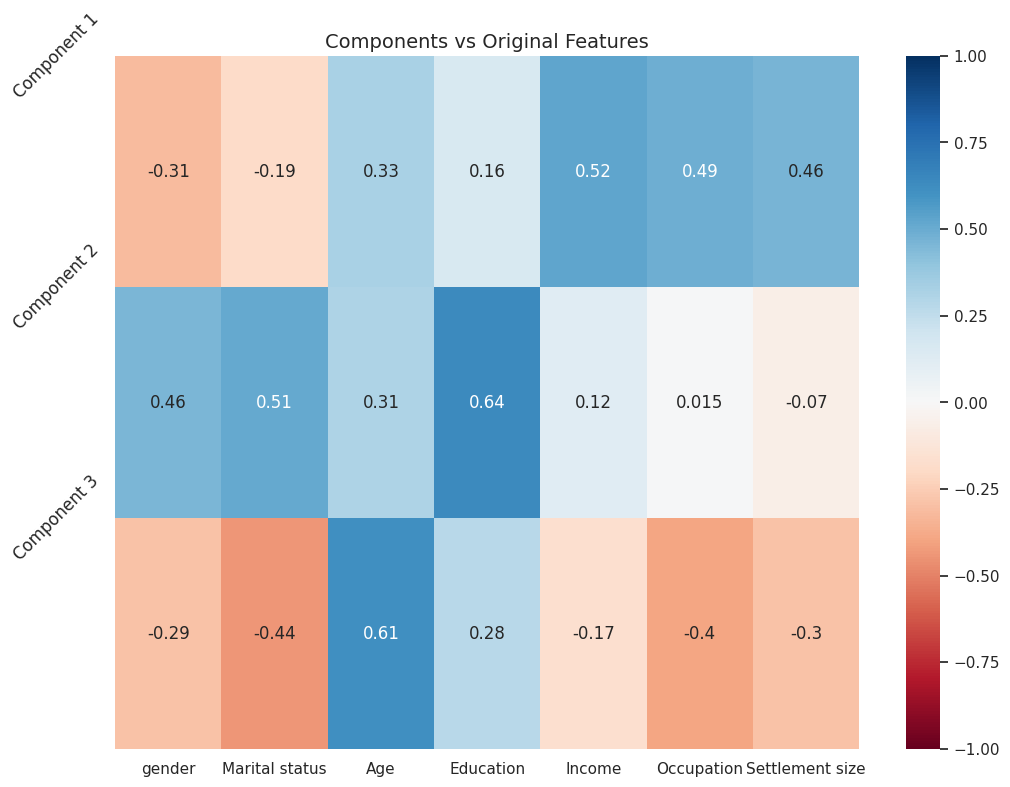

In [30]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2],
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()

In [31]:
pca.transform(df_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [32]:
scores_pca = pca.transform(df_std)

### ${\textbf{K-means clustering with PCA}}$

In [33]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

In [34]:
for i, wcss_value in enumerate(wcss, start=1):
    print(f"Number of clusters: {i}, WCSS: {wcss_value}")

Number of clusters: 1, WCSS: 11307.571135945918
Number of clusters: 2, WCSS: 7831.463142985713
Number of clusters: 3, WCSS: 5954.501868863843
Number of clusters: 4, WCSS: 4543.114849265297
Number of clusters: 5, WCSS: 3834.8071569968843
Number of clusters: 6, WCSS: 3317.518947042473
Number of clusters: 7, WCSS: 2869.8731124631727
Number of clusters: 8, WCSS: 2589.1701921872527
Number of clusters: 9, WCSS: 2280.21228582977
Number of clusters: 10, WCSS: 2018.25499880472


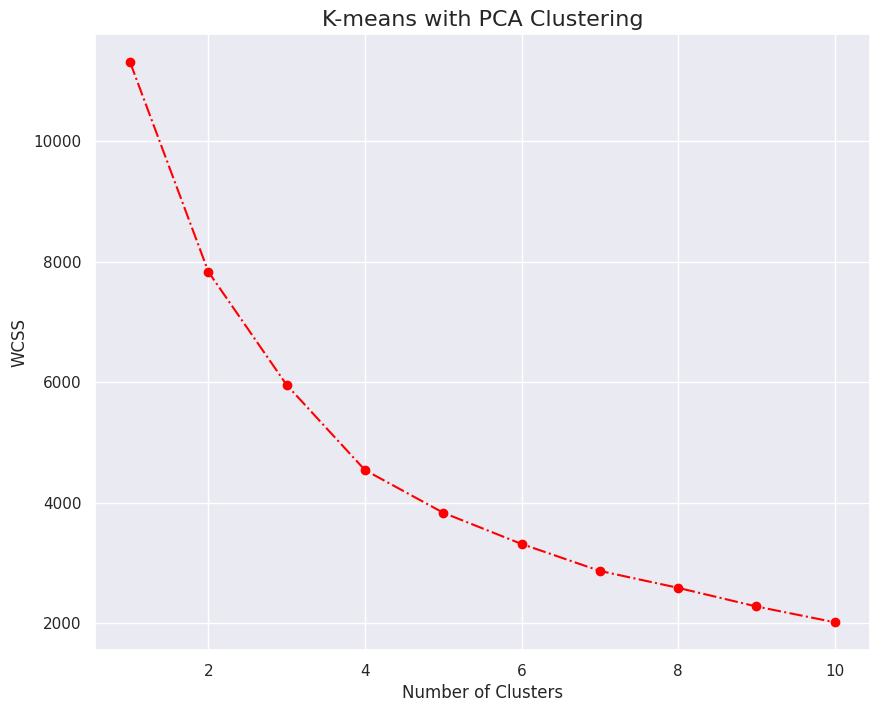

In [35]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering',fontsize = 16)
plt.show()

In [36]:
# We have chosen four clusters, so we run K-means with number of clusters equals four.
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [37]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

### ${\textbf{K-means clustering with PCA Results}}$

In [38]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [39]:
df_segm_pca_kmeans.head()

,gender,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1


In [40]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,gender,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [41]:
# Assuming df_segm_pca_kmeans is defined and contains necessary columns

# Grouping by 'Segment K-means PCA' and counting the number of observations in each segment
segment_counts = df_segm_pca_kmeans.groupby('Segment K-means PCA').size()

# Calculating the proportion of observations in each segment
proportion_obs = segment_counts / segment_counts.sum()


df_segm_pca_kmeans_freq = pd.DataFrame({'N Obs': segment_counts, 'Prop Obs': proportion_obs})


df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename(index={0: 'standard', 1: 'career focused', 2: 'fewer opportunities', 3: 'well-off'})

print(df_segm_pca_kmeans_freq)


                     N Obs  Prop Obs
Segment K-means PCA                 
standard               692    0.3460
career focused         583    0.2915
fewer opportunities    460    0.2300
well-off               265    0.1325


In [42]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard',
                                                          1:'career focused',
                                                          2:'fewer opportunities',
                                                          3:'well-off'})

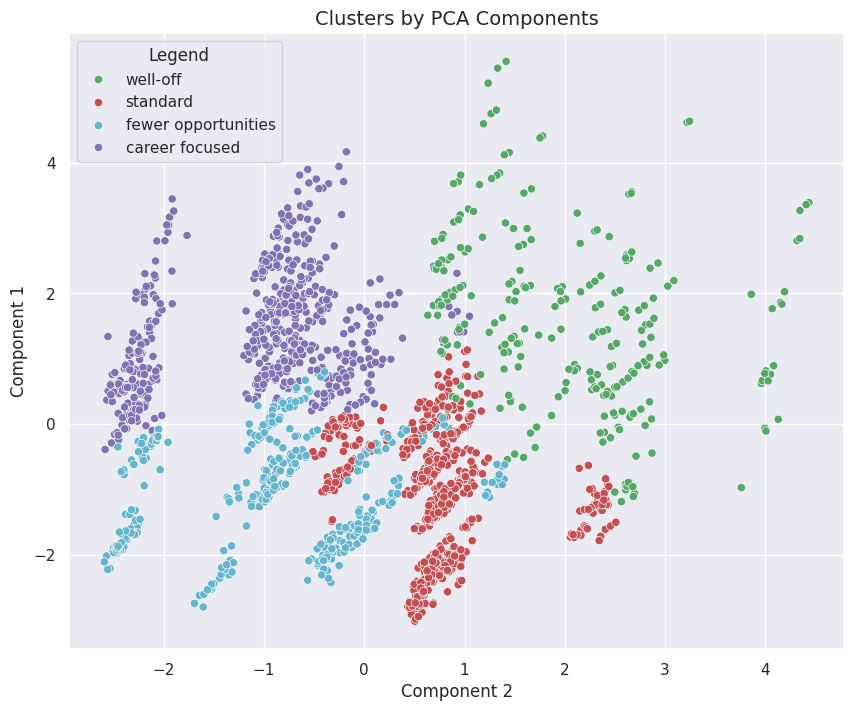

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_segm_pca_kmeans is defined and contains necessary columns

# Check if 'Component 1', 'Component 2', and 'Legend' columns exist in df_segm_pca_kmeans
required_columns = ['Component 1', 'Component 2', 'Legend']
if not all(col in df_segm_pca_kmeans.columns for col in required_columns):
    print("Error: Required columns not found in DataFrame.")
else:
    x_axis = df_segm_pca_kmeans['Component 2']
    y_axis = df_segm_pca_kmeans['Component 1']
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_pca_kmeans['Legend'], palette=['g', 'r', 'c', 'm'])
    plt.title('Clusters by PCA Components', fontsize=14)
    plt.xlabel('Component 2')
    plt.ylabel('Component 1')
    plt.show()
